# Lattice Simulations - Complex Systems Lab

This notebook implements solutions for lattice simulations, random walks, cellular automata, and Conway's Game of Life.

In [26]:

import numpy as np
import matplotlib.pyplot as plt
import random
import copy

# Helper function to display lattice
def plot_lattice(lattice, title="Lattice"):
    plt.figure(figsize=(6, 6))
    plt.imshow(lattice, cmap='gray_r', origin='upper')
    plt.title(title)
    plt.colorbar()
    plt.savefig(f"{title}.png")
    plt.show()


## Task 1: Generate a Square Lattice

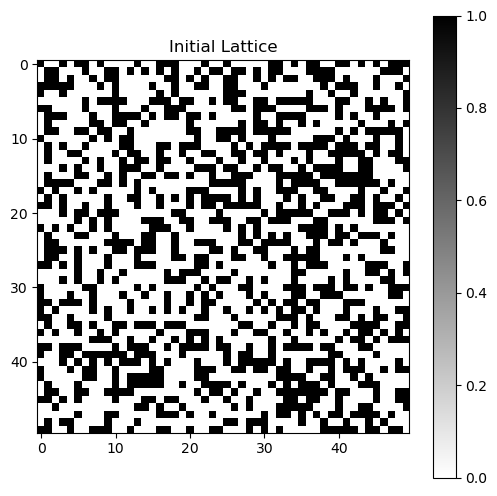

In [18]:

def generate_lattice(L, p):
    lattice = np.random.choice([1, 0], size=(L, L), p=[p, 1 - p])
    return lattice

# Parameters
L = 50  # Lattice size
p = 0.4  # Probability of a dog (1)

# Generate and plot lattice
lattice = generate_lattice(L, p)
plot_lattice(lattice, "Initial Lattice")

# Save lattice
np.savetxt("lattice.txt", lattice, fmt='%d')


## Task 2: Flea Simulation

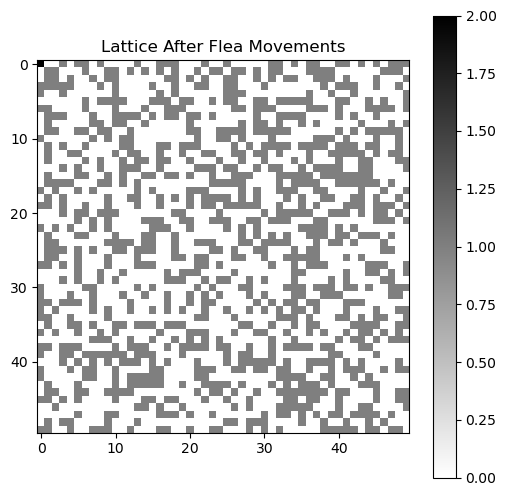

In [19]:

def find_first_dog(lattice):
    for j in range(lattice.shape[1]):
        if lattice[0, j] == 1:
            return (0, j)
    return None

def simulate_flea(lattice, t):
    lattice = copy.deepcopy(lattice)
    flea_pos = find_first_dog(lattice)
    if flea_pos is None:
        print("No dog found in first row.")
        return lattice
    
    x, y = flea_pos
    lattice[x, y] = 2  # Mark initial position
    
    for _ in range(t):
        neighbors = [(x-1, y), (x+1, y), (x, y-1), (x, y+1)]
        valid_moves = [(nx, ny) for nx, ny in neighbors if 0 <= nx < L and 0 <= ny < L and lattice[nx, ny] == 1]
        
        if valid_moves:
            x, y = random.choice(valid_moves)
            lattice[x, y] = 2  # Mark visited cell

    return lattice

# Parameters
t = 100  # Number of jumps

# Run flea simulation
infected_lattice = simulate_flea(lattice, t)
plot_lattice(infected_lattice, "Lattice After Flea Movements")

# Save infected lattice
np.savetxt("infected_lattice.txt", infected_lattice, fmt='%d')


### Epidemic Spread Analysis

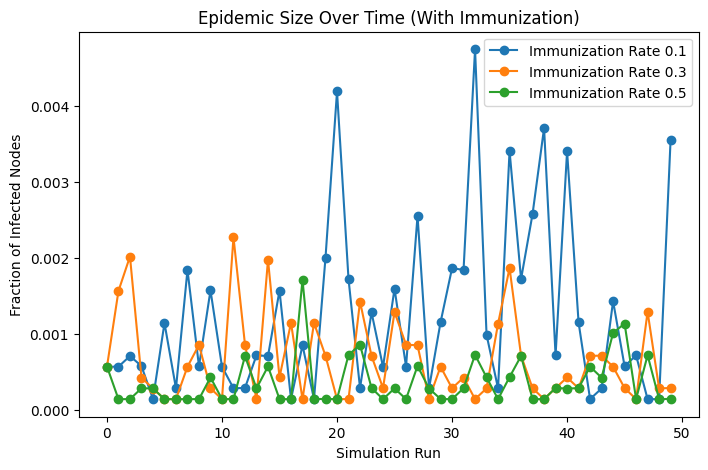

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import copy

# Helper function to generate a lattice
def generate_lattice(L, p, immunization_rate=0.0):
    lattice = np.random.choice([1, 0], size=(L, L), p=[p, 1 - p])  # Generate lattice with dogs (1) and empty spaces (0)
    
    # Apply immunization by changing a fraction of dogs to immune (3)
    total_dogs = np.sum(lattice == 1)
    num_immunized = int(immunization_rate * total_dogs)
    immunized_positions = random.sample(list(zip(*np.where(lattice == 1))), num_immunized)
    
    for pos in immunized_positions:
        lattice[pos] = 3  # Mark as immunized (3)
    
    return lattice

# Function to find the first dog in the first row or subsequent rows
def find_first_dog(lattice):
    for i in range(lattice.shape[0]):  # Iterate over rows in case the first row is empty
        for j in range(lattice.shape[1]):
            if lattice[i, j] == 1:  # Found an infected dog
                return (i, j)
    return None

# Flea simulation with infection spread, including immunization
def simulate_flea_updated(lattice, t):
    lattice = copy.deepcopy(lattice)  # Make a copy to avoid modifying the original
    flea_pos = find_first_dog(lattice)
    
    if flea_pos is None:
        print("No dog found in the lattice.")
        return lattice

    x, y = flea_pos
    lattice[x, y] = 2  # Mark the initial position as infected

    for _ in range(t):
        neighbors = [(x-1, y), (x+1, y), (x, y-1), (x, y+1)]
        valid_moves = [(nx, ny) for nx, ny in neighbors if 0 <= nx < lattice.shape[0]
                       and 0 <= ny < lattice.shape[1] and lattice[nx, ny] == 1]

        # Ensure the flea does not infect immunized dogs (marked as 3)
        valid_moves = [pos for pos in valid_moves if lattice[pos[0], pos[1]] != 3]

        if not valid_moves:  # If no valid moves, stop the simulation early
            break

        x, y = random.choice(valid_moves)
        lattice[x, y] = 2  # Mark as infected

    return lattice

# Function to calculate epidemic fraction
def updated_epidemic_fraction(lattice, t, num_runs, immunization_rate):
    fractions = []
    for _ in range(num_runs):
        # Generate a new lattice with given immunization rate for each run
        lattice_with_immunization = generate_lattice(lattice.shape[0], 0.7, immunization_rate)  # Adjust p and immunization
        infected_lattice = simulate_flea_updated(lattice_with_immunization, t)
        denom = np.sum(infected_lattice > 0)
        fraction = np.sum(infected_lattice == 2) / denom if denom > 0 else 0
        fractions.append(fraction)
    return fractions

# Visualization helper function
def plot_lattice(lattice, title="Lattice"):
    plt.figure(figsize=(6, 6))
    plt.imshow(lattice, cmap='viridis', origin='upper')
    plt.title(title)
    plt.colorbar(label="Cell State")
    plt.show()

# Parameters for epidemic spread analysis
L_large = 100  # Larger lattice size
p_high = 0.7  # Higher probability of dogs
t_long = 1000 # Longer simulation time
num_runs = 50  # Number of simulation runs

# Run the epidemic fraction analysis for different immunization rates
immunization_rates = [0.1, 0.3, 0.5]  # Testing different levels of immunization
all_fractions = {}

for immunization_rate in immunization_rates:
    fractions_improved = updated_epidemic_fraction(generate_lattice(L_large, p_high), t_long, num_runs, immunization_rate)
    all_fractions[immunization_rate] = fractions_improved

# Plot the updated epidemic size analysis
plt.figure(figsize=(8, 5))
for immunization_rate, fractions in all_fractions.items():
    plt.plot(range(num_runs), fractions, marker='o', linestyle='-', label=f'Immunization Rate {immunization_rate}')

plt.xlabel("Simulation Run")
plt.ylabel("Fraction of Infected Nodes")
plt.title("Epidemic Size Over Time (With Immunization)")
plt.legend()
plt.savefig("epidemic_size_with_immunization.png")
plt.show()


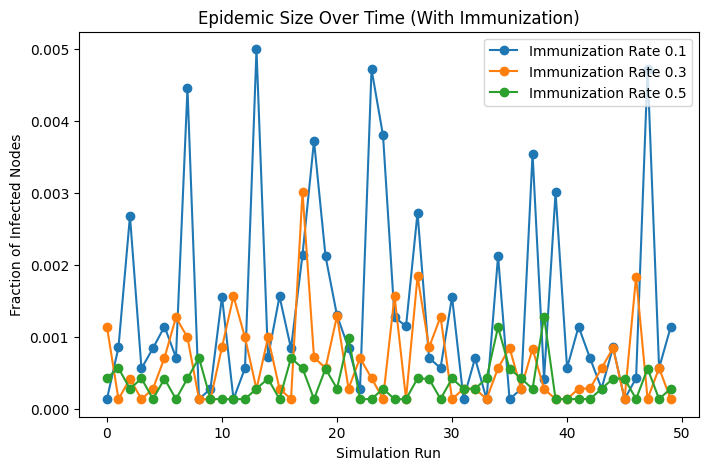

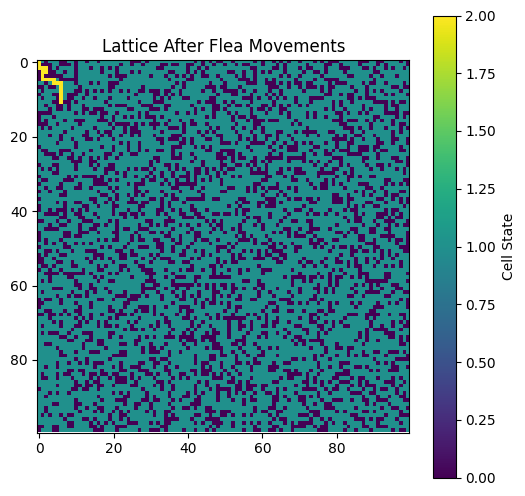

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random
import copy

# Helper function to generate a lattice


def generate_lattice(L, p, immunization_rate=0.0):
    # Generate lattice with dogs (1) and empty spaces (0)
    lattice = np.random.choice([1, 0], size=(L, L), p=[p, 1 - p])

    # Apply immunization by changing a fraction of dogs to immune (3)
    total_dogs = np.sum(lattice == 1)
    num_immunized = int(immunization_rate * total_dogs)
    immunized_positions = random.sample(
        list(zip(*np.where(lattice == 1))), num_immunized)

    for pos in immunized_positions:
        lattice[pos] = 3  # Mark as immunized (3)

    return lattice

# Function to find the first dog in the first row or subsequent rows


def find_first_dog(lattice):
    # Iterate over rows in case the first row is empty
    for i in range(lattice.shape[0]):
        for j in range(lattice.shape[1]):
            if lattice[i, j] == 1:  # Found an infected dog
                return (i, j)
    return None

# Flea simulation with infection spread, including immunization


def simulate_flea_updated(lattice, t):
    # Make a copy to avoid modifying the original
    lattice = copy.deepcopy(lattice)
    flea_pos = find_first_dog(lattice)

    if flea_pos is None:
        print("No dog found in the lattice.")
        return lattice

    x, y = flea_pos
    lattice[x, y] = 2  # Mark the initial position as infected

    for _ in range(t):
        neighbors = [(x-1, y), (x+1, y), (x, y-1), (x, y+1)]
        valid_moves = [(nx, ny) for nx, ny in neighbors if 0 <= nx < lattice.shape[0]
                       and 0 <= ny < lattice.shape[1] and lattice[nx, ny] == 1]

        # Ensure the flea does not infect immunized dogs (marked as 3)
        valid_moves = [
            pos for pos in valid_moves if lattice[pos[0], pos[1]] != 3]

        if not valid_moves:  # If no valid moves, stop the simulation early
            break

        x, y = random.choice(valid_moves)
        lattice[x, y] = 2  # Mark as infected

    return lattice

# Function to calculate epidemic fraction


def updated_epidemic_fraction(lattice, t, num_runs, immunization_rate):
    fractions = []
    for _ in range(num_runs):
        # Generate a new lattice with given immunization rate for each run
        lattice_with_immunization = generate_lattice(
            lattice.shape[0], 0.7, immunization_rate)  # Adjust p and immunization
        infected_lattice = simulate_flea_updated(lattice_with_immunization, t)
        denom = np.sum(infected_lattice > 0)
        fraction = np.sum(infected_lattice == 2) / denom if denom > 0 else 0
        fractions.append(fraction)
    return fractions

# Visualization helper function


def plot_lattice(lattice, title="Lattice"):
    plt.figure(figsize=(6, 6))
    plt.imshow(lattice, cmap='viridis', origin='upper')
    plt.title(title)
    plt.colorbar(label="Cell State")
    plt.savefig(f"{title}.png", dpi=300)
    plt.show()


# Parameters
L_large = 100  # Larger lattice size
p_high = 0.7  # Higher probability of dogs
t_long = 1000  # Longer simulation time
num_runs = 50  # Number of simulation runs
# Testing different levels of immunization
immunization_rates = [0.1, 0.3, 0.5]

# Run the epidemic fraction analysis for different immunization rates
all_fractions = {}

for immunization_rate in immunization_rates:
    fractions_improved = updated_epidemic_fraction(generate_lattice(
        L_large, p_high), t_long, num_runs, immunization_rate)
    all_fractions[immunization_rate] = fractions_improved

# Plot the updated epidemic size analysis
plt.figure(figsize=(8, 5))
for immunization_rate, fractions in all_fractions.items():
    plt.plot(range(num_runs), fractions, marker='o', linestyle='-',
             label=f'Immunization Rate {immunization_rate}')

plt.xlabel("Simulation Run")
plt.ylabel("Fraction of Infected Nodes")
plt.title("Epidemic Size Over Time (With Immunization)")
plt.legend()
plt.savefig("epidemic_size_with_immunization.png")
plt.show()

# Parameters for flea simulation
t = 100  # Number of jumps

# Create a lattice and run flea simulation
lattice = generate_lattice(L_large, p_high)
infected_lattice = simulate_flea_updated(lattice, t)
plot_lattice(infected_lattice, "Lattice After Flea Movements")

# Save infected lattice to file
np.savetxt("infected_lattice.txt", infected_lattice, fmt='%d')

## Task 3: Wolfram Cellular Automata

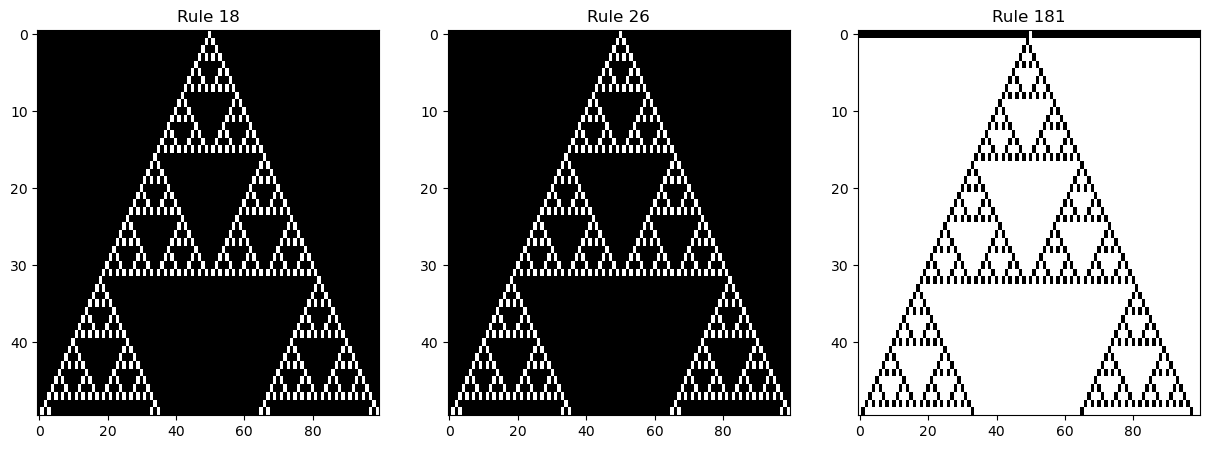

In [27]:

def wolfram_ca(rule, steps, size):
    rule_bin = np.array([int(x) for x in np.binary_repr(rule, width=8)])
    ca = np.zeros((steps, size), dtype=int)
    ca[0, size // 2] = 1  # Single seed
    
    for i in range(1, steps):
        for j in range(size):
            left = ca[i-1, (j-1) % size]
            center = ca[i-1, j]
            right = ca[i-1, (j+1) % size]
            idx = 7 - (left * 4 + center * 2 + right)
            ca[i, j] = rule_bin[idx]
    
    return ca

# Parameters
steps, size = 50, 100
rules = [18, 26, 181]

plt.figure(figsize=(15, 5))
for i, rule in enumerate(rules):
    ca = wolfram_ca(rule, steps, size)
    plt.subplot(1, len(rules), i+1)
    plt.imshow(ca, cmap='gray', aspect='auto')
    plt.title(f"Rule {rule}")

plt.savefig('ca_wolfram.png')
plt.show()


## Extra 1: Rule 30 with Different Boundaries

In [22]:

# Implement reflective, constant, random, and null boundary conditions for Rule 30
# Code implementation will go here


## Extra 2: Game of Life

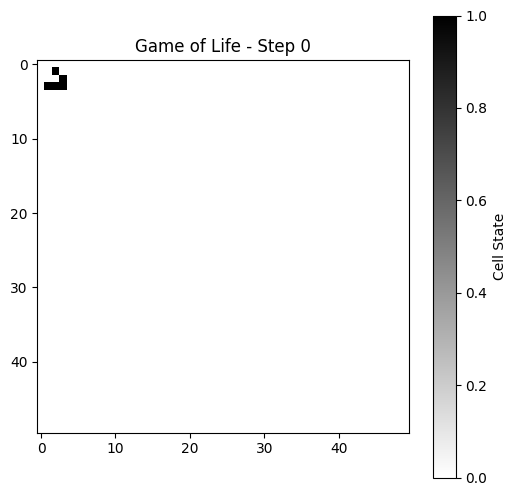

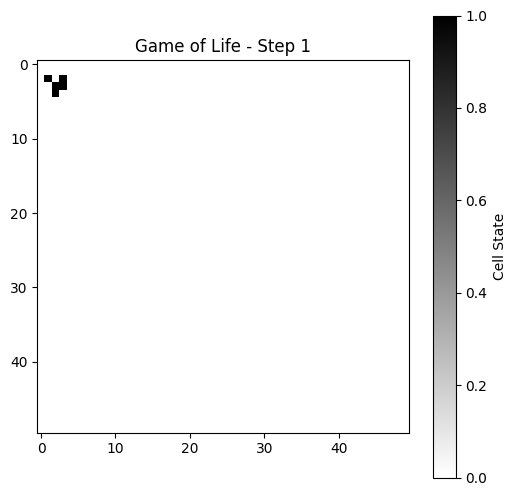

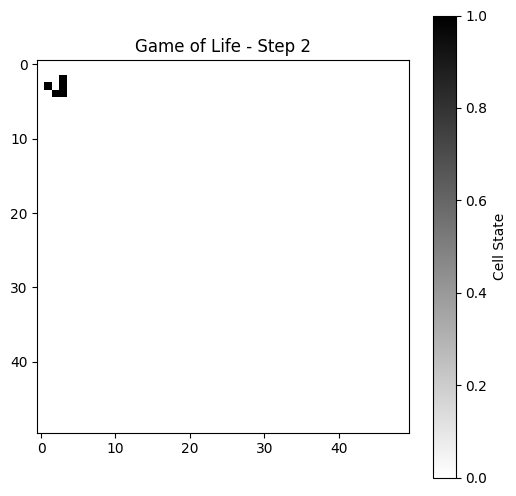

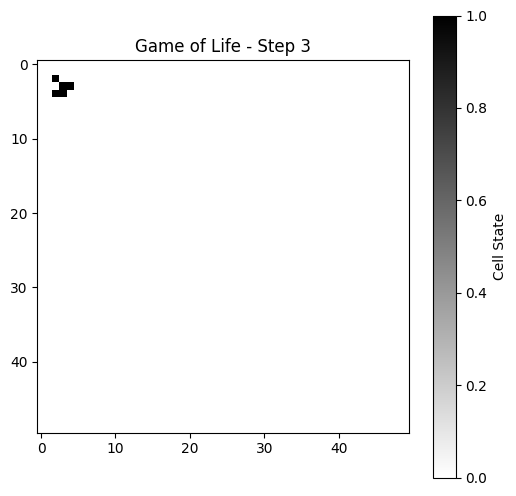

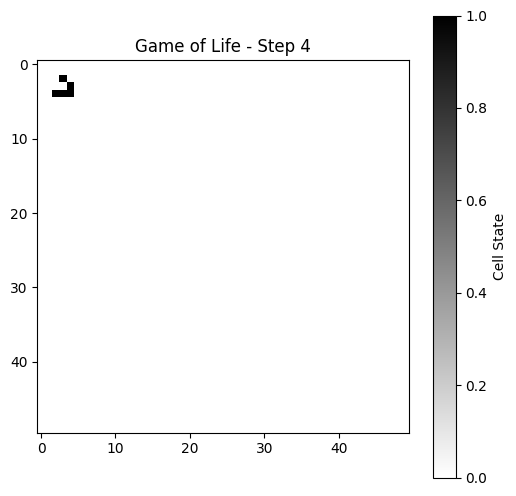

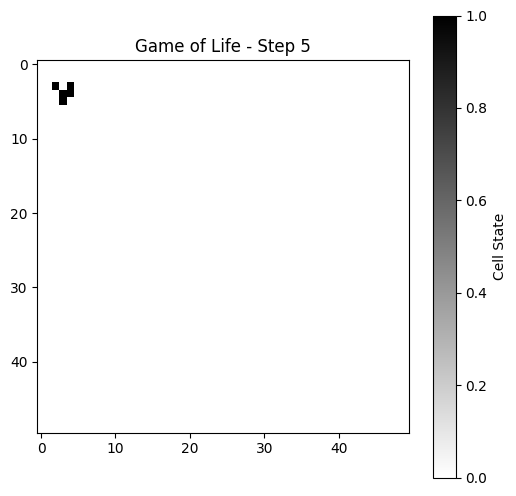

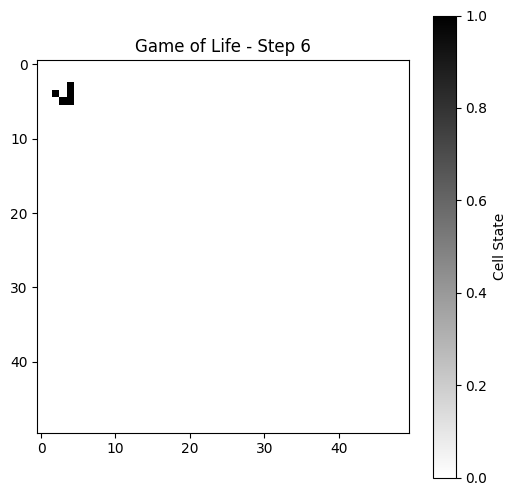

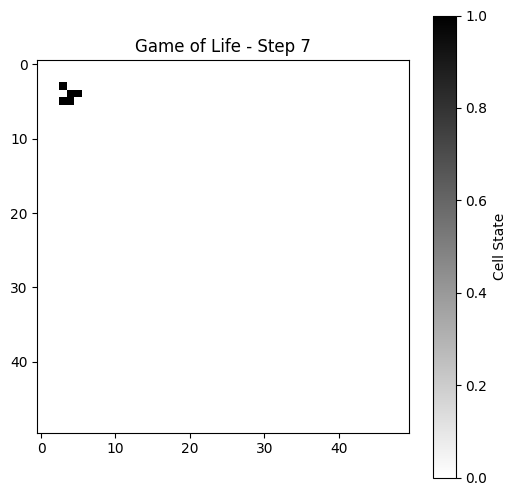

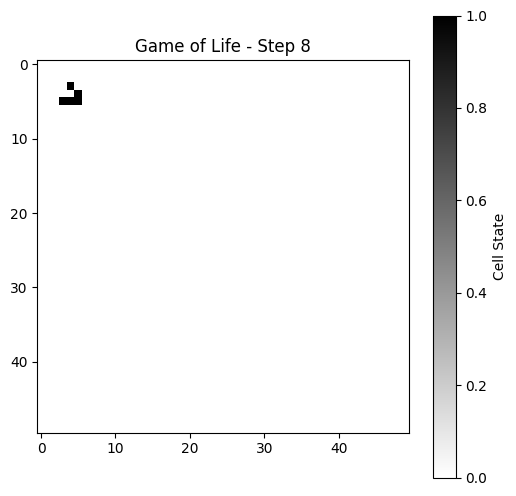

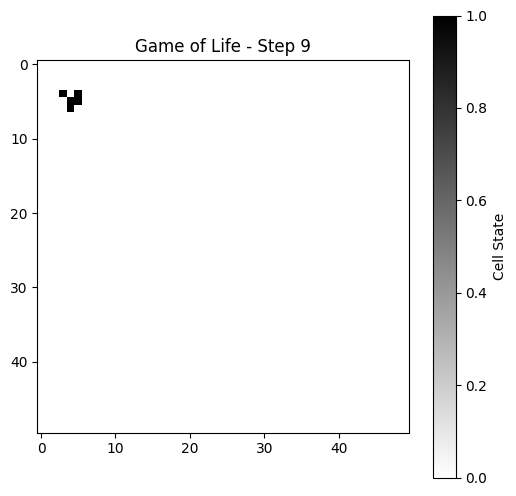

In [27]:
from scipy.signal import convolve2d
import numpy as np
import matplotlib.pyplot as plt

# Game of Life step function


def game_of_life_step(grid):
    kernel = np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1]])
    neighbors = convolve2d(grid, kernel, mode='same', boundary='wrap')
    return ((neighbors == 3) | ((grid == 1) & (neighbors == 2))).astype(int)

# Plot lattice helper function


def plot_lattice(grid, title="Grid"):
    plt.figure(figsize=(6, 6))
    plt.imshow(grid, cmap="gray_r", origin="upper")
    plt.title(title)
    plt.colorbar(label="Cell State")
    plt.savefig(f"game_of_life_step_{title}.png")
    plt.show()


# Initialize grid with a glider pattern
L = 50
grid = np.zeros((L, L), dtype=int)

# Add a glider pattern
glider = np.array([[0, 1, 0],
                   [0, 0, 1],
                   [1, 1, 1]])

# Place the glider in the grid
grid[1:4, 1:4] = glider

# Run simulation
for step in range(10):
    plot_lattice(grid, f"Game of Life - Step {step}")
    grid = game_of_life_step(grid)

In [24]:
from scipy.signal import convolve2d
import numpy as np
import matplotlib.pyplot as plt
import imageio
import io

# Game of Life step function


def game_of_life_step(grid):
    kernel = np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1]])
    neighbors = convolve2d(grid, kernel, mode='same', boundary='wrap')
    return ((neighbors == 3) | ((grid == 1) & (neighbors == 2))).astype(int)

# Save Game of Life simulation as a looping GIF


def save_game_of_life_as_gif(grid, steps, filename="game_of_life.gif"):
    frames = []

    for step in range(steps):
        # Generate the next step
        grid = game_of_life_step(grid)

        # Create a frame
        fig, ax = plt.subplots(figsize=(6, 6))
        ax.imshow(grid, cmap="gray_r", origin="upper")
        ax.set_title(f"Game of Life - Step {step}")
        ax.axis("off")

        # Save the plot to an in-memory buffer
        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        frames.append(imageio.imread(buf))
        plt.close(fig)

    # Save the frames as a looping GIF
    imageio.mimsave(filename, frames, fps=2, loop=0)
    print(f"GIF saved as {filename}")


# Initialize grid with a glider pattern
L = 50
grid = np.zeros((L, L), dtype=int)

# Add a glider pattern
glider = np.array([[0, 1, 0],
                   [0, 0, 1],
                   [1, 1, 1]])

# Place the glider in the grid
grid[1:4, 1:4] = glider

# Generate and save the GIF
save_game_of_life_as_gif(grid, steps=20, filename="game_of_life.gif")

/var/folders/1r/p1_3kg652bbgwr9qm_hgg_pc0000gn/T/ipykernel_20269/3392749964.py:35: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(buf))


GIF saved as game_of_life.gif
